# Midterm Project - Credit Risk Analysis

## Packages

In [261]:
#import packages
import pandas as pd
import numpy as np
np.set_printoptions(threshold=sys.maxsize) #allows us to view more objects in arrays
import sys
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer #for categorical variables
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
import pickle

## Data cleaning and preparation
To protect PII and proprietary information the data source is not disclosed and much of the cleaning including randomization of potential PII is done prior to loading the data and is NOT detailed in the project.

## load data

In [262]:
#load data from csv into dataframe
df = pd.read_csv('data.csv')
df.head()

,is_joint,applicant_credit_score,coapplicant_credit_score,is_boat,is_engine,is_rv,vehicle_age,is_vehicle_new,cash_price,trade_in_value,trade_in_payoff,doc_fee,amount_to_finance,payment,ltv,debt,down_payment,income,proposed_dti,current_dti,applicant_dti,applicant_age,is_funded
0,1,671,655,1,0,0,3,0,37500.0,0.0,0.0,1504.85,35004.85,194.47,1166828.33,12067.0,7000.0,18924.00,34.61,32.10,33.37,-1,0
1,1,675,604,1,0,0,12,0,17995.0,0.0,0.0,733.80,17871.93,148.93,110.14,2443.0,2000.0,6666.67,23.93,21.40,8.36,-1,0
2,0,-1,-1,1,0,0,0,1,12375.0,0.0,0.0,0.00,7375.00,87.80,93.05,0.0,5000.0,5833.33,1.51,0.00,1.51,53,0
3,1,727,699,1,0,0,1,1,87477.0,0.0,0.0,0.00,84025.00,350.10,108.15,7547.0,9400.0,3750.00,27.91,24.35,136.88,-1,0
4,1,640,628,1,0,0,4,0,22000.0,0.0,0.0,374.80,22744.80,157.95,114.57,2088.0,1000.0,4400.00,18.68,14.90,20.49,-1,0


In [263]:
#explore numerical variable variation in data
df.describe().round()

,is_joint,applicant_credit_score,coapplicant_credit_score,is_boat,is_engine,is_rv,vehicle_age,is_vehicle_new,cash_price,trade_in_value,trade_in_payoff,doc_fee,amount_to_finance,payment,ltv,debt,down_payment,income,proposed_dti,current_dti,applicant_dti,applicant_age,is_funded
count,39303.0,39303.0,39303.0,39303.0,39303.0,39303.0,39303.0,39303.0,39303.0,39303.0,39303.0,39303.0,39303.0,39248.0,3.930300e+04,39303.0,39303.0,39303.0,39303.0,39303.0,39303.0,39303.0,39303.0
mean,0.0,628.0,188.0,0.0,0.0,1.0,4.0,0.0,44685.0,2844.0,1800.0,584.0,39512.0,314.0,3.955620e+05,2005.0,6966.0,8186.0,58.0,50.0,1101.0,30.0,0.0
std,0.0,145.0,295.0,0.0,0.0,0.0,11.0,0.0,289427.0,10922.0,8509.0,566.0,288407.0,3500.0,2.860005e+07,2289.0,15024.0,14941.0,2304.0,2070.0,40543.0,24.0,0.0
min,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,6.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
25%,0.0,613.0,-1.0,0.0,0.0,0.0,0.0,0.0,22040.0,0.0,0.0,299.0,20036.0,150.0,9.500000e+01,678.0,2000.0,4000.0,19.0,15.0,19.0,-1.0,0.0
50%,0.0,652.0,-1.0,0.0,0.0,1.0,0.0,0.0,31980.0,0.0,0.0,463.0,29116.0,202.0,1.110000e+02,1482.0,4000.0,6000.0,29.0,24.0,31.0,35.0,0.0
75%,1.0,690.0,576.0,1.0,0.0,1.0,5.0,1.0,49730.0,0.0,0.0,736.0,44283.0,296.0,1.250000e+02,2750.0,7000.0,9300.0,39.0,34.0,45.0,49.0,0.0
max,1.0,893.0,892.0,1.0,1.0,1.0,1922.0,1.0,54499500.0,350000.0,259177.0,15182.0,54499500.0,648804.0,5.449950e+09,150094.0,619541.0,2000000.0,287309.0,254600.0,7448428.0,121.0,1.0


## clean data

Data cleaning was done previously to protect PII and proprietary information.

In [264]:
#split dataframes
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 11)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 11)

In [265]:
#reset indexes
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [266]:
#set target variable
y_train = (df_train.is_funded).astype('int').values
y_test = (df_test.is_funded).astype('int').values
y_val = (df_val.is_funded).astype('int').values

In [267]:
#remove target variable from dataframes
del df_train['is_funded']
del df_test['is_funded']
del df_val['is_funded']

## Decision tree

### Initial model

test dataset

In [268]:
#convert variables to dicts
train_dicts = df_train.fillna(0).to_dict(orient='records') #adding fillna to avoid downstream error temporarily

In [269]:
#train dictionary vectorizer
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [270]:
#fit model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

validation dataset

In [271]:
#now do the same for validation and prediction
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [272]:
#convert form 2d array to 1d to use roc auc
y_pred = dt.predict_proba(X_val)[:, 1]

In [273]:
roc_auc_score(y_val, y_pred)

0.5763584682577071

### Tuning

Main tuning parameters:  
`max_depth` - default is infinite depth  
`min_samples_leaf` - minimum # of samples needed at each leaf

#### `max_depth`

In [274]:
#tuning max_depth
for d in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, None]: #none means as many layers as possible
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred)

    print('%s -> %.3f' % (d, auc))

1 -> 0.606
2 -> 0.644
3 -> 0.668
4 -> 0.681
5 -> 0.693
6 -> 0.699
7 -> 0.710
8 -> 0.721
9 -> 0.723
10 -> 0.724
11 -> 0.722
12 -> 0.721
13 -> 0.705
14 -> 0.689
15 -> 0.669
20 -> 0.609
None -> 0.574


#### `min_samples_leaf`

In [275]:
scores = []

#tuning min_samples_leaf
for d in [7, 8, 9, 10, 11, 12, 13, 14, 15]:
    for s in [10, 20, 30, 40, 45, 50, 55, 60]: 
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))
        print('(%4s, %3d) -> %.3f' % (d, s, auc))

(   7,  10) -> 0.710
(   7,  20) -> 0.707
(   7,  30) -> 0.710
(   7,  40) -> 0.708
(   7,  45) -> 0.707
(   7,  50) -> 0.715
(   7,  55) -> 0.716
(   7,  60) -> 0.716
(   8,  10) -> 0.721
(   8,  20) -> 0.715
(   8,  30) -> 0.722
(   8,  40) -> 0.726
(   8,  45) -> 0.726
(   8,  50) -> 0.722
(   8,  55) -> 0.724
(   8,  60) -> 0.724
(   9,  10) -> 0.722
(   9,  20) -> 0.717
(   9,  30) -> 0.726
(   9,  40) -> 0.729
(   9,  45) -> 0.728
(   9,  50) -> 0.721
(   9,  55) -> 0.726
(   9,  60) -> 0.723
(  10,  10) -> 0.724
(  10,  20) -> 0.718
(  10,  30) -> 0.726
(  10,  40) -> 0.731
(  10,  45) -> 0.726
(  10,  50) -> 0.718
(  10,  55) -> 0.720
(  10,  60) -> 0.718
(  11,  10) -> 0.718
(  11,  20) -> 0.721
(  11,  30) -> 0.723
(  11,  40) -> 0.726
(  11,  45) -> 0.723
(  11,  50) -> 0.716
(  11,  55) -> 0.714
(  11,  60) -> 0.715
(  12,  10) -> 0.713
(  12,  20) -> 0.713
(  12,  30) -> 0.716
(  12,  40) -> 0.729
(  12,  45) -> 0.726
(  12,  50) -> 0.715
(  12,  55) -> 0.715
(  12,  60) -

In [276]:
#using a dataframe to more easily see the best auc score
columns=['max_depth','min_samples_leaf','auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.sort_values(by='auc', ascending=False)

,max_depth,min_samples_leaf,auc
27,10,40,0.730960
43,12,40,0.728792
19,9,40,0.728615
20,9,45,0.727852
22,9,55,0.726247
...,...,...,...
48,13,10,0.700858
56,14,10,0.696698
57,14,20,0.696607
64,15,10,0.685094


In [277]:
#can pivot to visualize easier
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot

auc                                                    \
max_depth               7         8         9         10        11        12   
min_samples_leaf                                                               
10                0.710316  0.720713  0.722168  0.723850  0.717717  0.712764   
20                0.706746  0.714987  0.717060  0.717814  0.720639  0.712982   
30                0.709538  0.721725  0.726160  0.726199  0.723149  0.716423   
40                0.707904  0.725720  0.728615  0.730960  0.725882  0.728792   
45                0.707447  0.725731  0.727852  0.725609  0.722732  0.725586   
50                0.715004  0.721886  0.721447  0.718044  0.716463  0.714771   
55                0.715942  0.724283  0.726247  0.719872  0.713660  0.715205   
60                0.715745  0.723507  0.723342  0.717768  0.715198  0.716293   

                                                
max_depth               13        14        15  
min_samples_leaf                                
10                0.700858  0.696698  0.685094  
20                0.703497  0.696607  0.683236  
30                0.710200  0.706673  0.702044  
40                0.725957  0.722368  0.718956  
45                0.724918  0.721129  0.719459  
50                0.711736  0.710487  0.708451  
55                0.712672  0.711995  0.710366  
60                0.716565  0.715338  0.712548

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

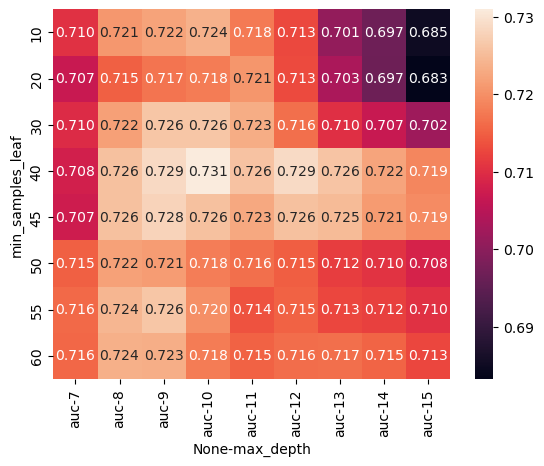

In [278]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

### Final model

In [279]:
#using tuned features to fit model
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=40)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=40)

In [280]:
#now for validation dataset
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)
#convert form 2d array to 1d to use roc auc
y_pred = dt.predict_proba(X_val)[:, 1]

roc_auc_score(y_val, y_pred)

0.7314296981748957

#### Full train

In [281]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = (df_full_train.is_funded).astype('int').values
#delete the target values from full train dataset
del df_full_train['is_funded']

In [282]:
#convert variables to dicts
dicts_full_train = df_full_train.fillna(0).to_dict(orient='records') #adding fillna to avoid downstream error temporarily
#transform full train dictionary into vectors
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
#do the same for test
dicts_test = df_test.to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [283]:
#convert form 2d array to 1d to use roc auc
y_pred = dt.predict_proba(X_full_train)[:, 1]

auc = roc_auc_score(y_full_train, y_pred)
auc

0.785116544210942

#### Visual decision tree

In [284]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- applicant_credit_score <= 629.50
|   |--- applicant_credit_score <= 576.50
|   |   |--- coapplicant_credit_score <= 561.50
|   |   |   |--- applicant_credit_score <= 573.50
|   |   |   |   |--- applicant_credit_score <= 551.50
|   |   |   |   |   |--- applicant_age <= 59.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- applicant_age >  59.50
|   |   |   |   |   |   |--- doc_fee <= 320.54
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- doc_fee >  320.54
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- applicant_credit_score >  551.50
|   |   |   |   |   |--- doc_fee <= 671.62
|   |   |   |   |   |   |--- cash_price <= 13107.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- cash_price >  13107.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- doc_fee >  671.62
|   |   |   |   |   |   |--- ltv <= 91.12
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- ltv >  91.12
| 

### Testing an input

In [285]:
#grab a random record
pd.set_option('display.max_columns', None)
random_record = df.sample(n=1)
print(random_record)

       is_joint  applicant_credit_score  coapplicant_credit_score  is_boat  \
38575         0                      -1                        -1        0   

       is_engine  is_rv  vehicle_age  is_vehicle_new  cash_price  \
38575          0      0            0               0   111781.32   

       trade_in_value  trade_in_payoff  doc_fee  amount_to_finance  payment  \
38575         19500.0          23200.0    229.0          107183.94    446.6   

          ltv  debt  down_payment  income  proposed_dti  current_dti  \
38575  109.55   0.0       15000.0  7000.0          6.38          0.0   

       applicant_dti  applicant_age  is_funded  
38575           6.38             48          0  


In [286]:
applicant_dict = {
    'is_joint': 0,
    'applicant_credit_score': 750,
    'coapplicant_credit_score': -1,
    'is_boat': 1,
    'is_engine': 0,
    'is_rv': 0,
    'vehicle_age': 0,
    'is_vehicle_new': 0,
    'cash_price': 78314.61,
    'trade_in_value': 0.0,
    'trade_in_payoff': 0.0,
    'doc_fee': 299.0,
    'amount_to_finance': 68978.26,
    'payment': 287.41,
    'ltv': 104.33,
    'debt': 3235.0,
    'down_payment': 8737.0,
    'income': 15626.0,
    'proposed_dti': 43.72,
    'current_dti': 38.14,
    'applicant_dti': 43.72,
    'applicant_age': 59
}

In [287]:
applicant_df = pd.DataFrame([applicant_dict])
applicant_dicts = applicant_df.to_dict(orient='records')
X_applicant = dv.transform(applicant_dicts)
y_pred_applicant = dt.predict_proba(X_applicant)[:, 1]
y_pred_applicant

array([0.05808477])

### Export model

In [288]:
model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=40)

In [289]:
#take model and write it to a file
output_file = f'model.bin'
f_out = open(output_file, 'wb') #wb specifies 'write' & 'binary'
pickle.dump((dv, model), f_out) #save model to specified file
f_out.close() #it is very easy to forget to close the file this best practice

In [290]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, model), f_out)

In [291]:
model_file = 'model.bin'

In [292]:
with open(model_file, 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [293]:
applicant_dict = {
    'is_joint': 0,
    'applicant_credit_score': 750,
    'coapplicant_credit_score': -1,
    'is_boat': 1,
    'is_engine': 0,
    'is_rv': 0,
    'vehicle_age': 0,
    'is_vehicle_new': 0,
    'cash_price': 78314.61,
    'trade_in_value': 0.0,
    'trade_in_payoff': 0.0,
    'doc_fee': 299.0,
    'amount_to_finance': 68978.26,
    'payment': 287.41,
    'ltv': 104.33,
    'debt': 3235.0,
    'down_payment': 8737.0,
    'income': 15626.0,
    'proposed_dti': 43.72,
    'current_dti': 38.14,
    'applicant_dti': 43.72,
    'applicant_age': 59
}

In [294]:
applicant_df = pd.DataFrame([applicant_dict])
applicant_dicts = applicant_df.to_dict(orient='records')
X_applicant = dv.transform(applicant_dicts)
y_pred_applicant = dt.predict_proba(X_applicant)[:, 1]
y_pred_applicant

array([0.05808477])